# Лабораторная работа №3
рынок: **Китай** <br>
период: **2018 год**

Седунов Илья, <br>
Альперович Вадим, <br>
Славутин Александр, <br>
17ПМИ.

In [1]:
import random
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import warnings
import seaborn as sns
from seaborn import set_style
set_style('dark')
warnings.simplefilter('ignore')

### Подготовка модели.

- Выберите на рынке 20 активов (N=20).

- По наблюдениям за 2018 год оцените математические ожидания доходностей и матрицу ковариаций доходностей (используйте выборочную матрицу ковариаций). 

- Найденные вектор средних и матрица ковариаций будут далее использованы в экспериментах как «истинные» вектор E=(E1, E2, …, EN) и матрица ковариаций (σi,j).

- Убедитесь, что матрица ковариаций невырожденная (если она близка к вырожденной, то измените состав активов). 


In [2]:
# Сбор случайных 250 активов Китайского рынка за 2018 год

random.seed(100)

df = pd.read_excel('data/china_stocks.xlsx').drop_duplicates(['Symbol'])
symbols = list(df['Symbol'])
symbols = random.choices(symbols, k=1000)
print('Количество китайских тикеров =', len(symbols))

Количество китайских тикеров = 1000


In [3]:
from IPython.display import clear_output
start = "2018-01-01"
end   = "2018-12-31"
stocks = {}

for symbol in tqdm_notebook(symbols):
    stock = yf.download(symbol, start=start, end=end, progress=False)
    if stock[~np.isnan(stock['Close'])].shape[0] < 220:
        print('Drop because of nan values', symbol)
        continue
    stock['return'] = stock['Close'] / stock['Close'].shift(1)
    stock['log_return'] = np.log(stock['return'])
    stocks[symbol] = stock
clear_output()
print('Акции собраны!')

# удаление пустых записей

for symbol in symbols:
    try:
        stocks[symbol] = stocks[symbol].dropna()
    except:
        continue

Акции собраны!


In [4]:
# сбор общей статистики

stock_stat = pd.DataFrame(columns=['symbol',  'E', 'Sigma', 'mean_vol', 'n_observations'])
for symbol in tqdm_notebook(symbols):
    try:
        stock = stocks[symbol].dropna()
        stock_stat.loc[symbol] = [symbol,
                                  stock['log_return'].mean(),
                                  stock['log_return'].std(), 
                                  stock['Volume'].mean(), 
                                  len(stock)]
    except:
        continue
stock_stat.dropna(inplace=True)
print('Осталось активов после обработки', len(stock_stat))


Осталось активов после обработки 768


In [5]:
def get_return_mean_cov(df, sse_components=False): 
    # получить по выбранным активам матрицу их доходностей, 
    # вектор средних доходностей и матрицу ковариации
    
    r_matrix = {}
    if sse_components:
        for i in range(len(df)):
            symbol = df.index[i]
            r_matrix[symbol] = sse_stocks[symbol]['log_return']
    else:
        for symbol in df['symbol']:
            r_matrix[symbol] = stocks[symbol]['log_return'] 
    r_df = pd.DataFrame(r_matrix).dropna()
    return r_df.values, r_df.mean().values, r_df.cov().values

def plot_mean_var_map(df,x='Sigma', y='E', title='Карта активов:σ от E', figsize=(12, 6)):
    # получить карту риск от дохоности
    
    ax = df.plot(x=x, y=y, s=np.log(df['mean_vol']**3), 
                          kind='scatter', 
                          figsize=figsize, 
                          edgecolor='black',
                          grid=True)
    plt.xlabel('Sigma', size=15)
    plt.ylabel('E', size=15)
    plt.title(title, size=16)

Выберем 20 активов с наибольшей платой за риск

In [6]:
stock_stat['sharp'] = (stock_stat.E)**2 / stock_stat.Sigma
selected20 = stock_stat.sort_values(['sharp'], ascending=False).iloc[:20]
selected20

,symbol,E,Sigma,mean_vol,n_observations,sharp
300266.SZ,300266.SZ,-0.006689,0.034849,3.210197e+07,242,0.001284
300110.SZ,300110.SZ,-0.005637,0.029538,2.539578e+07,242,0.001076
002077.SZ,002077.SZ,-0.005632,0.033010,9.160520e+06,242,0.000961
002573.SZ,002573.SZ,-0.004757,0.025483,9.584909e+06,242,0.000888
002617.SZ,002617.SZ,-0.004140,0.021047,1.052856e+07,242,0.000814
300083.SZ,300083.SZ,-0.004881,0.029478,2.101371e+07,242,0.000808
600499.SS,600499.SS,-0.004305,0.025021,1.756916e+07,242,0.000741
600595.SS,600595.SS,-0.004245,0.025032,1.195527e+07,242,0.000720
600568.SS,600568.SS,-0.004964,0.035639,3.214945e+07,242,0.000691
300320.SZ,300320.SZ,-0.004467,0.029484,6.474994e+06,242,0.000677


Получим вектор средних и выборчную матрицу ковариации выбранных акций

In [7]:
return_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20) 
return_matrix.shape, mean_vec.shape, cov_matrix.shape

((242, 20), (20,), (20, 20))

Посмотрим на вектор собственных значений

In [8]:
np.around(np.linalg.eigvals(cov_matrix),4)

array([0.0064, 0.0015, 0.0009, 0.0008, 0.0007, 0.0007, 0.0002, 0.0006,
       0.0002, 0.0003, 0.0003, 0.0005, 0.0003, 0.0004, 0.0005, 0.0004,
       0.0005, 0.0005, 0.0004, 0.0004])

Попытаемся выбрать активы с наибольшим минимальным собственным значением

In [9]:
gen_lst = []
for i in tqdm_notebook(range(10000)):
    selected20 = stock_stat.sample(200).sort_values(['sharp'], ascending=False).iloc[:20]
    return_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20) 
    min_eigen_val = np.min(np.linalg.eigvals(cov_matrix))
    gen_lst.append((min_eigen_val, selected20))

In [10]:
gen_lst = sorted(gen_lst, key=lambda x: x[0], reverse=True)
selected20 = gen_lst[0][1]
return_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20)
np.around(np.linalg.eigvals(cov_matrix), 4)

array([0.0062, 0.0024, 0.0016, 0.0014, 0.0011, 0.001 , 0.0009, 0.0008,
       0.0008, 0.0007, 0.0006, 0.0006, 0.0003, 0.0004, 0.0003, 0.0003,
       0.0003, 0.0004, 0.0005, 0.0005])

In [11]:
from cvxopt import matrix, solvers
from scipy.optimize import minimize


def risk_portfolio(X, cov_matrix):
    return np.sqrt(np.dot(np.dot(X, cov_matrix), X.T))
    
    
def objective_function(X, mean_vec, cov_matrix, b):
    return (-np.dot(mean_vec, X)) + b * np.dot(np.dot(X, cov_matrix), X.T)
    
    
def optimize_portfolio(mean_vec,
                       cov_matrix, 
                       b, 
                       bounds, 
                       objective_function=objective_function,
                       cvxopt=False):
    if cvxopt:
        r_avg = matrix(mean_vec)
        sigma = matrix(b*cov_matrix)
        n = mean_vec.shape[0]
        P = sigma
        q = matrix(-mean_vec)
        
        # inequality constraint 
        G = matrix( -np.identity(n) )
        h = matrix( np.zeros((n,1)) )  
        
        # equality constraint Ax = d; captures the constraint sum(x) == 1
        A = matrix(1.0, (1,n))
        d = matrix(1.0)
        sol = solvers.qp(P, q, G, h, A, d, show_progress=True)
        #clear_output()
        return np.array([x for x in sol['x']])
    
    else: # scipy.minimize
        N = cov_matrix.shape[0]
        X = np.ones(N)
        X = X / X.sum()
        bounds = bounds * N

        constraints=[]
        constraints.append({'type': 'eq', 
                            'fun' : lambda X: np.sum(X) - 1.0})

        
        return minimize(objective_function, X,
                        args=(mean_vec, cov_matrix, b), method='SLSQP',
                        constraints=constraints,
                        bounds=bounds).x

### 1. Истинный оптимальный портфель в модели Марковица с заданным отношением к риску. 

Задана константа b. Решите задачу оптимизации 

$$-E(x)+ b\sigma(x) \rightarrow min,$$   $$x_1+x_2+\cdots+x_N =1$$ $$x_i \ge 0$$
    
(т.е. найдите оптимальный портфель с отношением к риску, равным b). Найдите и зафиксируйте веса портфеля и значение целевой функции. 

Здесь $E(x)= E_1 x_1+E_2 x_2+\cdots+E_N x_N$ , $ \sigma (x)= \sum \sum σ_{ij} x_ix_j$


**Примечание 1.**

Константа b подобрана таким образом, что истинный оптимальный CVaR портфель совпадает с истинным оптимальным портфелем п.1. Значение константы смотри в упражнениях к теме
$$b= \frac{1}{\sqrt{2\pi}}\frac{1}{\sqrt{1-\beta}}exp(-\frac{(\Phi^{-1}(\beta))^2)}{2})$$

Итак, найдем $b$ из условия $b=\Phi^{-1}(\beta)$, где $\Phi$ - ф-ция стандартного нормального распределения, а beta - увeренность для CVaR

In [344]:
from scipy.stats import norm

beta = 0.95

b = norm.ppf(beta) # ppf - percent point function for standart normal distribution
b

1.6448536269514722

In [189]:
X = optimize_portfolio(mean_vec, cov_matrix, b, bounds=((0, 1),))

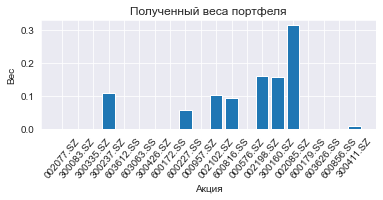

In [190]:
def plot_weights_histogram(weights, data):
    plt.figure(figsize=(6,2))
    try:
        x_values = data['symbol'].values
    except:
        x_values = data['names'].values
    x = np.arange(len(weights))
    plt.xlabel('Акция')
    plt.ylabel('Вес')
    height = weights
    plt.bar(x, height=height)
    plt.xticks(x, x_values, rotation='50')
    plt.grid()
    
plot_weights_histogram(X, selected20)
plt.title('Полученный веса портфеля')
pass

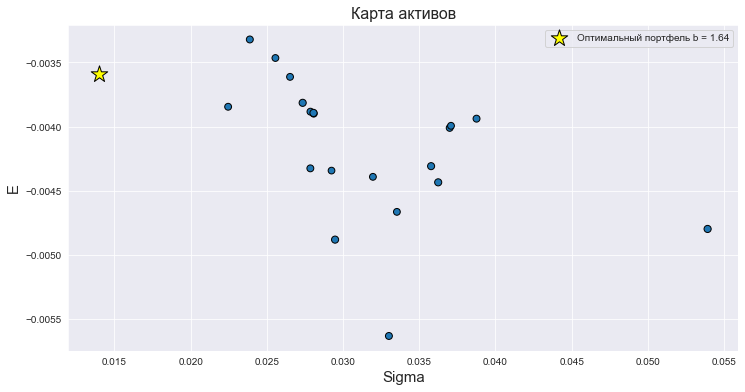

In [191]:
plot_mean_var_map(selected20, title='Карта активов')
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.legend()
pass

### 2. Оценка неопределенности оптимального портфеля в модели Марковица с заданным отношением к риску. 

**2.1. Задайте число наблюдений T=30.**

С помощью генератора многомерного нормального распределения создайте выборку размера Т из нормального распределения с вектором математических ожиданий  E=(E1, E2, …, EN) и матрицей ковариаций (σi,j).

In [428]:
T = 30
r_matrix_gen = np.random.multivariate_normal(mean_vec, cov_matrix, T)
r_matrix_gen.shape

(30, 20)

**2.2. По построенной выборке сделайте оценку $E^{est}$ вектора математических ожиданий и оценку $ \sigma ^{est}$ матрицы ковариаций.**


In [429]:
mean_vec_est = np.mean(r_matrix_gen, axis=0)
cov_matrix_est = np.cov(r_matrix_gen.T)
mean_vec_est.shape, cov_matrix_est.shape

((20,), (20, 20))

In [430]:
import pprint

print('Истинный вектор средних:')
pprint.pprint(np.around(mean_vec, 3))
print()
print('Оценки вектора средних:')
pprint.pprint(np.around(mean_vec_est, 3))

Истинный вектор средних:
array([-0.006, -0.005, -0.004, -0.004, -0.005, -0.004, -0.004, -0.004,
       -0.004, -0.004, -0.004, -0.004, -0.004, -0.004, -0.003, -0.003,
       -0.004, -0.004, -0.005, -0.004])

Оценки вектора средних:
array([-0.012,  0.007, -0.001,  0.004, -0.005, -0.001, -0.001, -0.004,
       -0.002,  0.003,  0.004,  0.01 , -0.018,  0.001,  0.001, -0.007,
       -0.001,  0.009, -0.006, -0.009])


**2.3 Используя эти оценки решите задачу оптимизации**

$$-E^{est}(x)+ b\sigma^{est}(x) \rightarrow min,$$   $$x_1+x_2+\cdots+x_N =1$$ $$x_i \ge 0$$

Здесь $E^{est}(x)= E^{est}_1 x_1+E^{est}_2 x_2+\cdots+E^{est}_N x_N$ , $ \sigma^{est} (x)= \sum \sum σ^{est}_{ij} x_ix_j$

(т.е. найдите выборочный оптимальный портфель с отношением к риску, равным b). Найдите и зафиксируйте веса портфеля и значение целевой функции.

In [431]:
X_est = optimize_portfolio(mean_vec_est, cov_matrix_est, b, bounds=((0, 1),))

**2.4 Сравните два портфеля: истинный (п.1) и выборочный (п.2.3).**

Оцените относительную ошибку в определении весов портфеля в норме Manhattan (L1 норма Минковского). Сделайте выводы. Сделайте сравнение в системе координат (σ, E).

In [385]:
print('Истинные веса портфеля:')
pprint.pprint(np.around(X, 3))
print()
print('Оценки весов портфеля:')
pprint.pprint(np.around(X_est, 3))

Истинные веса портфеля:
array([0.   , 0.   , 0.   , 0.11 , 0.   , 0.   , 0.   , 0.   , 0.058,
       0.   , 0.101, 0.092, 0.   , 0.161, 0.157, 0.313, 0.   , 0.   ,
       0.   , 0.008])

Оценки весов портфеля:
array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.917, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.083, 0.   ])


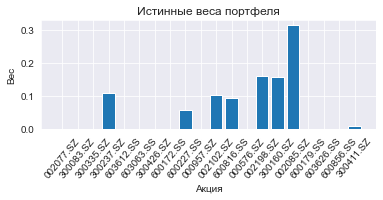

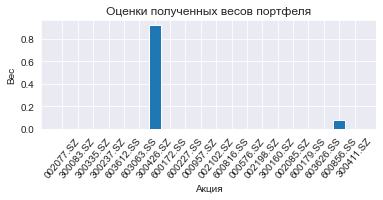

In [386]:
plot_weights_histogram(X, selected20)
plt.title('Истинные веса портфеля')
plt.show()
plot_weights_histogram(X_est, selected20)
plt.title('Оценки полученных весов портфеля')
pass

In [387]:
print('L1 норма вектора X - Xest:', np.around(np.linalg.norm(X - X_est, ord=1), 3))

L1 норма вектора X - Xest: 2.0


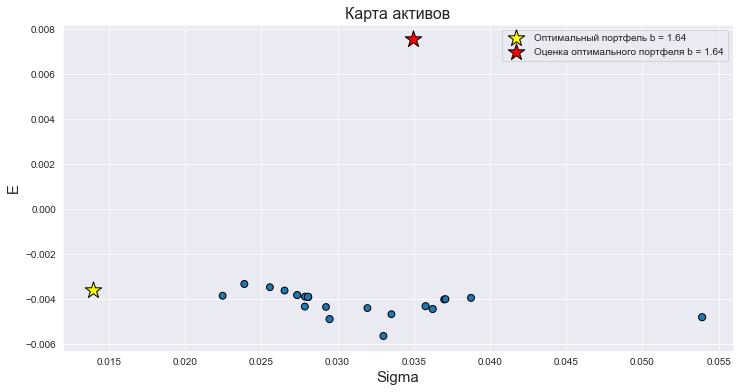

In [388]:
plot_mean_var_map(selected20, title='Карта активов')
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.scatter(risk_portfolio(X_est, cov_matrix_est),
            np.dot(mean_vec_est, X_est), 
            c='red',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оценка оптимального портфеля b = %.2f' % b)
plt.legend()
pass

**Вывод:**

Исходя из значений весов портфеля и их оценок, L1-нормы этих векторов, а также сравнения портфелей по карте $E$ от $\sigma$ можно сделать вывод, что разница существенна. Оценка оптимального портфеля с задданным параметром $b$ имеет завышенную доходность и риск.

**2.5. Повторите эксперимент S=40 раз и оцените среднюю относительную ошибку по S повторениям эксперимента.**

Сделайте выводы.  

Сделайте сравнение в системе координат (σ, E). 

In [389]:
S = 40 

experiments = []

for i in tqdm_notebook(range(S)):
    experiment = {}
    experiment['i'] = i
    experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    experiment['mean_vec_est'] = np.mean(experiment['r_matrix_gen'], axis=0)
    experiment['cov_matrix_est'] = np.cov(experiment['r_matrix_gen'].T)
    experiment['X_est'] =  optimize_portfolio( experiment['mean_vec_est'], 
                                              experiment['cov_matrix_est'], 
                                              b, 
                                              bounds=((0, 1),))
    experiment['L1-norm'] = np.linalg.norm(X - experiment['X_est'], ord=1)
    experiments.append(experiment)

In [390]:
l1_norms = [experiment['L1-norm'] for experiment in experiments]
l1_norms_mean  = np.mean(l1_norms)
l1_norms_std  = np.std(l1_norms)
print('Средняя L1-норма по %d экспериментам: %.3f' % (S, l1_norms_mean))
print('Примерный 95 прц. доверительный интервал: [%.3f, %.3f]' %
      (l1_norms_mean - 2*l1_norms_std, l1_norms_mean + 2*l1_norms_std))

Средняя L1-норма по 40 экспериментам: 1.839
Примерный 95 прц. доверительный интервал: [1.375, 2.302]


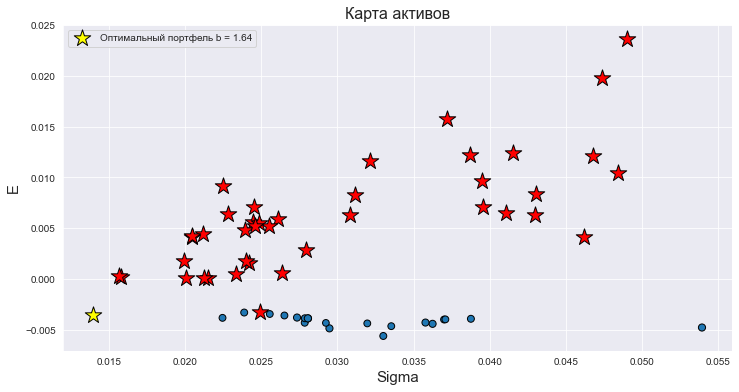

In [391]:
plot_mean_var_map(selected20, title='Карта активов')

for experiment in experiments:
    plt.scatter(risk_portfolio(experiment['X_est'], experiment['cov_matrix_est']),
                np.dot(experiment['mean_vec_est'], experiment['X_est']), 
                c='red',
                marker='*',
                s=300, 
                edgecolors='black')
    
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.legend()
pass

**Вывод:**

Исходя из 40 проведенных экспериментов можно видеть, что в среднем оценки весов существенно далеки от истинных, хоть некоторые портфели, построенные по данным оценкам, относительно близки к истинному на карте активов, в целом можно отметить сильную зависимость от сгенерированных наблюдений.

**2.6  Предположите, что нам известны точные значения математических ожиданий E=(E1, E2, …, EN).**

Повторите пп. 2.2-2.5. используя оценку только матрицы ковариаций (т.е. решайте задачу оптимизации 

$$-E^{est}(x)+ b\sigma^{est}(x) \rightarrow min,$$   $$x_1+x_2+\cdots+x_N =1$$ $$x_i \ge 0$$

Здесь $E^{est}(x)= E^{est}_1 x_1+E^{est}_2 x_2+\cdots+E^{est}_N x_N$ , $ \sigma^{est} (x)= \sum \sum σ^{est}_{ij} x_ix_j$


Сравните точность этих портфелей и портфелей п.2.3

In [392]:
experiments_with_true_mean = []

for i in tqdm_notebook(range(S)):
    experiment = {}
    experiment['i'] = i
    experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    experiment['mean_vec_est'] = np.mean(experiment['r_matrix_gen'], axis=0)
    experiment['cov_matrix_est'] = np.cov(experiment['r_matrix_gen'].T)
    experiment['X_est'] =  optimize_portfolio(mean_vec,                     # используем истинный вектор средних
                                              experiment['cov_matrix_est'], 
                                              b, 
                                              bounds=((0, 1),))
    experiment['L1-norm'] = np.linalg.norm(X - experiment['X_est'], ord=1)
    experiments_with_true_mean.append(experiment)

In [393]:
l1_norms = [experiment['L1-norm'] for experiment in experiments_with_true_mean]
l1_norms_mean  = np.mean(l1_norms)
l1_norms_std  = np.std(l1_norms)
print('Средняя L1-норма по %d экспериментам: %.3f' % (S, l1_norms_mean))
print('Примерный 95 прц. доверительный интервал: [%.3f, %.3f]' %
      (l1_norms_mean - 2*l1_norms_std, l1_norms_mean + 2*l1_norms_std))

Средняя L1-норма по 40 экспериментам: 0.477
Примерный 95 прц. доверительный интервал: [0.144, 0.810]


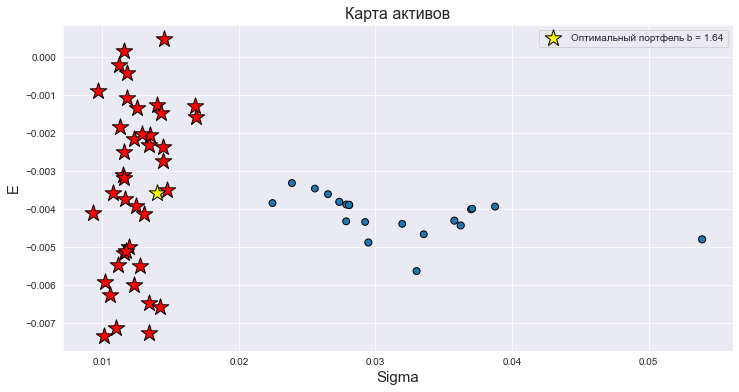

In [394]:
plot_mean_var_map(selected20, title='Карта активов')

for experiment in experiments_with_true_mean:
    plt.scatter(risk_portfolio(experiment['X_est'], experiment['cov_matrix_est']),
                np.dot(experiment['mean_vec_est'], experiment['X_est']), 
                c='red',
                marker='*',
                s=300, 
                edgecolors='black')
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.legend()
pass

**Вывод:**

Исходя из 40 проведенных экспериментов с истинным вектором средних можно видеть, что в  оценки весов существенно улучшились (судя по L1-норме примерно в 6 раз) и стали ближе к истинным, такой же вывод можно сделать и по по карте $E$ от $\sigma$, где сгенерированные портфели стали располагаться существенно ближе к истинному портфелю не только по доходности, но и по риску.

### 3. Оценка неопределенности оптимального CVaR портфеля 

**3.1 Уровень значимости β выбран 0,95. Число наблюдений T.**

Используя сгенерированные наблюдения из п.2.1 решите задачу ЛП для определения оптимального CVaRβ портфеля.  Найдите и зафиксируйте веса портфеля и значение целевой функции CVaR.  


In [432]:
def get_u_t(a_, X, beta, r_matrix_gen, t):
    #a = np.quantile(-np.dot(r_matrix_gen, X), beta)
    return max(-sum(X*r_matrix_gen[t]) - a_, 0)

def get_u_t_sum(a_, X, beta, r_matrix_gen):
    u_t_sum = 0
    for t in range(0, T-1):
        u_t_sum+=u_t_sum + get_u_t(a_, X, beta, r_matrix_gen, t)
    return u_t_sum

def objective_function_cvar(X, beta, T, r_matrix_gen, a_):
    u_t_sum = get_u_t_sum(a_, X, beta, r_matrix_gen)
    #a = np.quantile(-np.dot(r_matrix_gen, X), beta)
    print(a)
    return a_ + 1/(T*(1 - beta)) * u_t_sum

def optimize_portfolio_cvar(r_matrix_gen,
                       beta,
                       T,
                       bounds=((0, 1),), 
                       objective_function=objective_function_cvar,
                       cvxopt=False):
        if cvxopt:
            T = r_matrix_gen.shape[0]
            N = r_matrix_gen.shape[1]
            P_np = np.zeros((N + T + 1, N + T + 1))
            P_np[N + 1:,N + 1:] = np.identity(T) * 1.0/(T*(1.0 - beta))
            q_np = np.zeros(N + T + 1)
            q_np[0] = 1.0
            G_np = np.zeros((N + T + 1, N + T + 1))
            G_np[N + 1:, 0] = -1.0
            G_np[1:N + 1, 1:N + 1] = - np.identity(N)
            G_np[N + 1:,N + 1:] = - np.identity(T)
            G_np[N + 1:,1:N + 1] = - r_matrix_gen
            h_np = np.zeros((N + T + 1, 1))
            A_np = np.zeros(N + T + 1)
            A_np[1:N+1] = 1 
            
            P = matrix(P_np, (N + T + 1, N + T + 1))
            q = matrix(q_np)
            G = matrix(G_np, )
            h = matrix(np.zeros((N + T + 1, 1)))
            A = matrix(A_np, (1, N + T + 1))
            d = matrix(1.0)
            print("N: {}, T: {}".format(N, T))
            print("Shapes:\nP: {}\nq: {}\nG: {}\nh: {}\nA: {}\nd: {}".format(P_np.shape, q_np.shape, G_np.shape, h_np.shape, A_np.shape, d))
            sol = solvers.qp(P, q, G, h, A, d, show_progress=True)
            clear_output()
            return np.array([x for x in sol['x']])
        else:
            N = cov_matrix.shape[0]
            X = np.ones(N)
            X = X / X.sum()
            a = 0.0
            bounds = bounds * N
            constraints=[]
            constraints.append({'type': 'eq', 
                                'fun': lambda X: np.sum(X) - 1.0})

            return minimize(objective_function, X,
                            args=(beta, T, r_matrix_gen, a), method='SLSQP',
                            constraints=constraints,
                            bounds=bounds).x


    
beta = 0.95
X_est_cvar_ = optimize_portfolio_cvar(r_matrix_gen, beta, T, cvxopt=True)
X_est_cvar = X_est_cvar_[1:20+1]
alpha_cvar = X_est_cvar_[0]

In [434]:
print("VaR(X_est_var*) = {}, alpha* = {}".format(np.quantile(-np.dot(r_matrix_gen, X_est_cvar), beta), alpha_cvar))
print("VaR(X_est*) = {}, alpha* = {}".format(np.quantile(-np.dot(r_matrix_gen, X_est), beta), alpha_cvar))

VaR(X_est_var*) = 0.019788559271419856, alpha* = -0.059004715677316785
VaR(X_est*) = 0.03075270274241161, alpha* = -0.059004715677316785


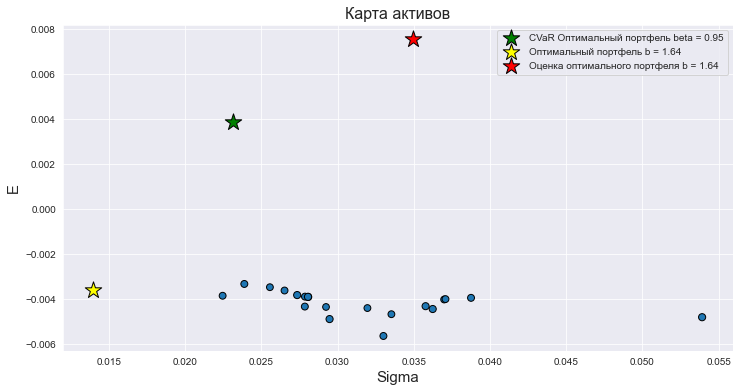

In [419]:
plot_mean_var_map(selected20, title='Карта активов')
#X_est_cvar = optimize_portfolio_cvar(r_matrix_gen, beta, T)
plt.scatter(risk_portfolio(X_est_cvar, cov_matrix_est),
            np.dot(mean_vec_est, X_est_cvar), 
            c='green',
            marker='*',
            s=300, 
            edgecolors='black',
            label='CVaR Оптимальный портфель beta = %.2f' % beta)
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.scatter(risk_portfolio(X_est, cov_matrix_est),
            np.dot(mean_vec_est, X_est), 
            c='red',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оценка оптимального портфеля b = %.2f' % b)
plt.legend()

In [420]:
print('Истинные веса портфеля:')
pprint.pprint(np.around(X, 3))
print()
print('Оценки весов портфеля CVaR:')
pprint.pprint(np.around(X_est_cvar, 3))

Истинные веса портфеля:
array([0.   , 0.   , 0.   , 0.11 , 0.   , 0.   , 0.   , 0.   , 0.058,
       0.   , 0.101, 0.092, 0.   , 0.161, 0.157, 0.313, 0.   , 0.   ,
       0.   , 0.008])

Оценки весов портфеля CVaR:
array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.416, 0.   , 0.005,
       0.   , 0.243, 0.   , 0.   , 0.   , 0.   , 0.   , 0.044, 0.   ,
       0.14 , 0.151])


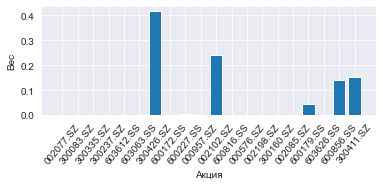

In [421]:
plot_weights_histogram(X_est_cvar, selected20)

In [366]:
#objective_function_cvar_value = objective_function_cvar(X_est_cvar, beta, T, r_matrix_gen)
#print('Значение целевой функции:')
#pprint.pprint(objective_function_cvar_value)

**3.2 Сравните два портфеля: истинный (п.1) и найденный в п.3.1.**  
    
Оцените относительную ошибку в определении весов портфеля в норме Manhattan (L1 норма Минковского). Сравните с ошибкой портфеля из п. 2.3


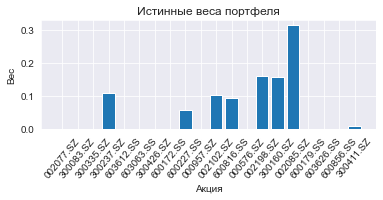

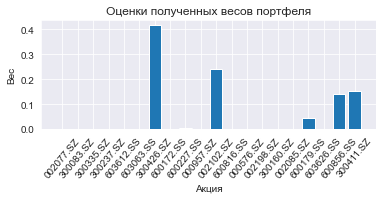

In [422]:
plot_weights_histogram(X, selected20)
plt.title('Истинные веса портфеля')
plt.show()
plot_weights_histogram(X_est_cvar, selected20)
plt.title('Оценки полученных весов портфеля')
pass

In [423]:
L1_cvar = np.around(np.linalg.norm(X - X_est_cvar, ord=1), 3)
L1_est = np.around(np.linalg.norm(X - X_est, ord=1),3)
print("Ошибка портфеля в (п.2.3)  L1 = {}\nОшибка портфеля из (п.3.1) L1 = {}".format(L1_est, L1_cvar, ))

Ошибка портфеля в (п.2.3)  L1 = 2.0
Ошибка портфеля из (п.3.1) L1 = 1.77


**Комментарий:** После нахождения весов с помощью **CVaR optimization** и решения задачи LP оценили ошибку L1 относительно истинного портфеля. Она оказалась ниже, чем ошибка L1 п.2.3 (Модель Марковица).

**3.3. Повторите эксперимент S раз и оцените среднюю относительную ошибку по S повторениям эксперимента.** 

Сделайте выводы.  Сравните с ошибкой из п. 2.5 


In [424]:
experiments_with_cvar = []

for i in tqdm_notebook(range(S)):
    experiment = {}
    experiment['i'] = i
    experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    experiment['mean_vec_est_cvar'] = np.mean(experiment['r_matrix_gen'], axis=0)
    experiment['cov_matrix_est_cvar'] = np.cov(experiment['r_matrix_gen'].T)
    experiment['X_est_cvar'] =  optimize_portfolio_cvar(experiment['r_matrix_gen'], beta, T)
    experiment['L1-norm'] = np.linalg.norm(X - experiment['X_est_cvar'], ord=1)
    experiments_with_cvar.append(experiment)

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00  1.00e+00  1.00e+00]

[ 1.00e+00

In [425]:
l1_norms_cvar = [experiment['L1-norm'] for experiment in experiments_with_cvar]
l1_norms_mean_cvar  = np.mean(l1_norms_cvar)
l1_norms_std_cvar  = np.std(l1_norms_cvar)
print('Средняя L1-норма по %d экспериментам: %.3f' % (S, l1_norms_mean_cvar))
print('Примерный 95 прц. доверительный интервал: [%.3f, %.3f]' %
      (l1_norms_mean_cvar - 2*l1_norms_std_cvar, l1_norms_mean_cvar + 2*l1_norms_std_cvar))

Средняя L1-норма по 40 экспериментам: 1.289
Примерный 95 прц. доверительный интервал: [1.239, 1.339]


**Вывод**: По проведённым экспериментам, можно заметить, что усредненная L1-норма уменьшилась относительно п.2.5, относительно одного запуска алгоритма - средняя L1-норма увеличилась. 

**Примечание!:** Для экспериментов в п.3.3 наблюдения генерировались каждый раз заново (т.к при запуске алгоритма на наблюдениях п.2.1 усреднённая L1-норма и дов. интервал остаются неизменными относительно однократного запуска алгоритма)

**Примечание 2.** 

Для сравнения результатов п.2 и п.3 используйте одни и те же сгенерированные наблюдения. 
